[<< back to main index](../README.md)

# Linear Regression in PySpark

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

PySpark has a class called Linear Regression that can be used to do simple linear regression models.

In [1]:
# initialize Spark Session
import os
import sys
top_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
if top_dir not in sys.path:
    sys.path.append(top_dir)

from init_spark import init_spark
spark = init_spark()
spark

Initializing Spark...
Spark found in :  /Users/sujee/spark
Spark config:
	 spark.app.name=TestApp
	spark.master=local[*]
	executor.memory=2g
	spark.sql.warehouse.dir=/var/folders/lp/qm_skljd2hl4xtps5vw0tdgm0000gn/T/tmp_ci4wlj5
	some_property=some_value
Spark UI running on port 4040


## Example : Tips
Here is our tip data.  This shows 10 observations of bill with tip amounts.

| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 

## Step 1: Let's create a Pandas dataframe with the data

Note that pandas dataframes are not the same as spark dataframes.  However, Pandas dataframes are ubiquitous in python (for small datasets) and are a nifty way to ensure that we have our data's schema match perfectly.

In [2]:
import pandas as pd

tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })
tip_data


,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


## Step 2: Let's do a quick plot of the data
Let us use matplotlib to do a quick scatter plot of the data. Note that this is not a Spark dataframe, this is using the pandas dataframe.

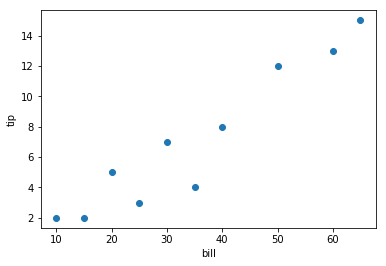

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()

## Step 3: Create a Spark Dataframe
Let's now take our pandas dataframe and make a spark dataframe out of it.

In [4]:
spark_tips = spark.createDataFrame(tip_data)
spark_tips.show(100)

+----+----+
|bill| tip|
+----+----+
|50.0|12.0|
|30.0| 7.0|
|60.0|13.0|
|40.0| 8.0|
|65.0|15.0|
|20.0| 5.0|
|10.0| 2.0|
|15.0| 2.0|
|25.0| 3.0|
|35.0| 4.0|
+----+----+



## Step 4: Create a Features column with the Vector

We need to create a feature vector here.  You might wonder why we need a "vector" after all there's only one variable: "bill."  Nonetheless, we still need the dataframe to have a column called "features" of type Vector Double).

Luckily, there's a handy class called VectorAssembler that does this for us.

In [5]:
from pyspark.ml.feature import VectorAssembler

## TODO: build a vector from the input column "bill"
assembler = VectorAssembler(inputCols=["bill"], outputCol="features")
featureVector = assembler.transform(spark_tips)

featureVector.show()


+----+----+--------+
|bill| tip|features|
+----+----+--------+
|50.0|12.0|  [50.0]|
|30.0| 7.0|  [30.0]|
|60.0|13.0|  [60.0]|
|40.0| 8.0|  [40.0]|
|65.0|15.0|  [65.0]|
|20.0| 5.0|  [20.0]|
|10.0| 2.0|  [10.0]|
|15.0| 2.0|  [15.0]|
|25.0| 3.0|  [25.0]|
|35.0| 4.0|  [35.0]|
+----+----+--------+



## Step 5: Create a Label column with the Vector

We need a way to have the outcome variable.  In this case, we are trying to predict the tip from the bill.  So, we need to signal to Spark MLlib which one is the outcome variable.  In this case, we'll create a new variable called label.

In [6]:
## TODO : create a new column to mirror 'tip'
featureVector = featureVector.withColumn("label", featureVector["tip"])

#featureVector = featureVector.withColumnRenamed("tip", "label")  # this will rename existing tip column

featureVector.show()

+----+----+--------+-----+
|bill| tip|features|label|
+----+----+--------+-----+
|50.0|12.0|  [50.0]| 12.0|
|30.0| 7.0|  [30.0]|  7.0|
|60.0|13.0|  [60.0]| 13.0|
|40.0| 8.0|  [40.0]|  8.0|
|65.0|15.0|  [65.0]| 15.0|
|20.0| 5.0|  [20.0]|  5.0|
|10.0| 2.0|  [10.0]|  2.0|
|15.0| 2.0|  [15.0]|  2.0|
|25.0| 3.0|  [25.0]|  3.0|
|35.0| 4.0|  [35.0]|  4.0|
+----+----+--------+-----+




## Step 6: Run Linear Regression in Spark

Let's run our linear regression.  To do this we need to run call the LinearRegression Classs

In [7]:
from pyspark.ml.regression import LinearRegression

## TODO: set number of iterations to 10
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

## TODO : Try with default params too
# lr = LinearRegression(maxIter=???)  # default params -- zero

lrModel = lr.fit(featureVector)

intercept = lrModel.intercept  # This is the intercept
slope = lrModel.coefficients[0] #This is the slope

print("linear model : ", lrModel)
print("intercept : ", intercept)
print("slope : ", slope)

linear model :  LinearRegression_43ca87f74d751da5ce29
intercept :  -0.8217112049846651
slope :  0.2263346058567047


## Step 7: Plot the fit line (abline)

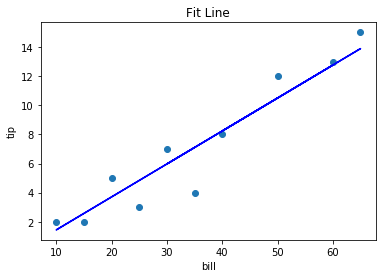

In [8]:
# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in tip_data.bill]

# Plot the best fit line over the actual values
plt.scatter(tip_data.bill, tip_data.tip)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

## Step 8: Print out model metrics

### 8.1 - Coefficients

In [9]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients[0]))
print("Intercept: %s" % str(lrModel.intercept))


# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))

# print("RMSE: %f" % trainingSummary.rootMeanSquaredError)

Coefficients: 0.2263346058567047
Intercept: -0.8217112049846651
numIterations: 3
objectiveHistory: [0.5000000000000002, 0.4158224893708402, 0.10101250448579287]


### 8.2 - Correlation Coefficient (r)
Correlation Coefficient (r) denotes how strongly X & Y are inter-related.  

Spark ML can create a correlation Matrix which shows how all the variables in the dataset are correlated, if at all.  Naturally, every variable will have a correlation of 1 when compared to itself.


In [10]:
from pyspark.ml.stat import Correlation

assembler = VectorAssembler(inputCols=["bill", "tip"], outputCol="features")
correlationVector = assembler.transform(spark_tips)

r1 = Correlation.corr(correlationVector, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))


Pearson correlation matrix:
DenseMatrix([[1.        , 0.95221535],
             [0.95221535, 1.        ]])


**==>  Question : Does bill amount influence tip amount? (are they strongly linked?)**


### 8.3 - Coefficient of Determination (r&sup2;)

In [11]:
## TODO : print 'r2' from training summary
## Hint : Use TAB completion
print("r2: %f" % trainingSummary.r2)

r2: 0.902517


### 8.4 - RMSE

In [19]:
trainingSummary.rootMeanSquaredError

1.4133017206321472

## Step 9: Calculate tip for $100 bill

In [13]:
# Print the coefficients and intercept for linear regression
print("Slope: %s" % str(lrModel.coefficients[0]))
print("Intercept: %s" % str(lrModel.intercept))

a = lrModel.coefficients[0]
b = lrModel.intercept

Slope: 0.2263346058567047
Intercept: -0.8217112049846651


In [14]:

bill = 100
## we have already calculated a & b above
tip_for_100 = a * bill + b
print("tip for $100 bill = ", tip_for_100)


tip for $100 bill =  21.811749380685804


## Step 10: Add a estimated_tip column to pandas and spark dataframe


In [15]:
tip_data['est_tip'] =  tip_data.bill * a + b

tip_data

,bill,tip,est_tip
0,50.0,12.0,10.495019
1,30.0,7.0,5.968327
2,60.0,13.0,12.758365
3,40.0,8.0,8.231673
4,65.0,15.0,13.890038
5,20.0,5.0,3.704981
6,10.0,2.0,1.441635
7,15.0,2.0,2.573308
8,25.0,3.0,4.836654
9,35.0,4.0,7.100000


### Add estimated tip column to pyspark dataframe

This is a bit tricky. We need to use the sql expr function to make this work.

The formula: (bill * a) + b

In [16]:
from pyspark.sql.functions import expr

formula = "(bill * " + str(a) + ") + " + str(b)

print(formula)
## Step 6: Add estimated tip column to spark dataframe
spark_tips_with_est = spark_tips.withColumn("est_tip", expr(formula))
spark_tips_with_est.show()

(bill * 0.2263346058567047) + -0.8217112049846651
+----+----+------------------+
|bill| tip|           est_tip|
+----+----+------------------+
|50.0|12.0| 10.49501908785057|
|30.0| 7.0| 5.968326970716475|
|60.0|13.0|12.758365146417617|
|40.0| 8.0| 8.231673029283524|
|65.0|15.0|13.890038175701141|
|20.0| 5.0| 3.704980912149429|
|10.0| 2.0| 1.441634853582382|
|15.0| 2.0|2.5733078828659055|
|25.0| 3.0| 4.836653941432952|
|35.0| 4.0|               7.1|
+----+----+------------------+



## Step 11: Perform a prediction
Let's try to run a prediction on some data: $45.00, $55.00, and $65.00 


In [17]:
test_data_pd = pd.DataFrame({'bill' : [45., 55., 65.],
             })
test_data_spark =  spark.createDataFrame(test_data_pd)
test_assembler = VectorAssembler(inputCols=["bill"], outputCol="features")
test_features = test_assembler.transform(test_data_spark)

## Hint : Transform 'test_features'
test_predictions = lrModel.transform(test_features)

test_predictions.show()

+----+--------+------------------+
|bill|features|        prediction|
+----+--------+------------------+
|45.0|  [45.0]| 9.363346058567046|
|55.0|  [55.0]|11.626692117134095|
|65.0|  [65.0]|13.890038175701141|
+----+--------+------------------+



## Step 12: Complete Code

   bill   tip
0  50.0  12.0
1  30.0   7.0
2  60.0  13.0
3  40.0   8.0
4  65.0  15.0
5  20.0   5.0
6  10.0   2.0
7  15.0   2.0
8  25.0   3.0
9  35.0   4.0


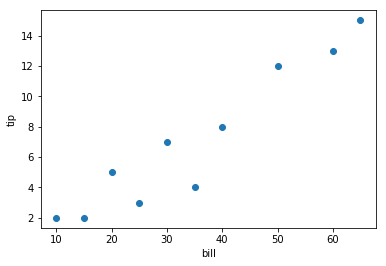

+----+----+
|bill| tip|
+----+----+
|50.0|12.0|
|30.0| 7.0|
|60.0|13.0|
|40.0| 8.0|
|65.0|15.0|
|20.0| 5.0|
|10.0| 2.0|
|15.0| 2.0|
|25.0| 3.0|
|35.0| 4.0|
+----+----+

+----+----+--------+
|bill| tip|features|
+----+----+--------+
|50.0|12.0|  [50.0]|
|30.0| 7.0|  [30.0]|
|60.0|13.0|  [60.0]|
|40.0| 8.0|  [40.0]|
|65.0|15.0|  [65.0]|
|20.0| 5.0|  [20.0]|
|10.0| 2.0|  [10.0]|
|15.0| 2.0|  [15.0]|
|25.0| 3.0|  [25.0]|
|35.0| 4.0|  [35.0]|
+----+----+--------+

+----+----+--------+-----+
|bill| tip|features|label|
+----+----+--------+-----+
|50.0|12.0|  [50.0]| 12.0|
|30.0| 7.0|  [30.0]|  7.0|
|60.0|13.0|  [60.0]| 13.0|
|40.0| 8.0|  [40.0]|  8.0|
|65.0|15.0|  [65.0]| 15.0|
|20.0| 5.0|  [20.0]|  5.0|
|10.0| 2.0|  [10.0]|  2.0|
|15.0| 2.0|  [15.0]|  2.0|
|25.0| 3.0|  [25.0]|  3.0|
|35.0| 4.0|  [35.0]|  4.0|
+----+----+--------+-----+



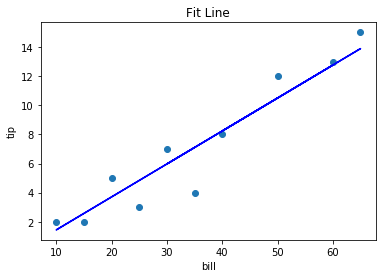

Coefficients: 0.2263346058567047
Intercept: -0.8217112049846651
numIterations: 3
objectiveHistory: [0.5000000000000002, 0.4158224893708402, 0.10101250448579287]
+--------------------+
|           residuals|
+--------------------+
|  1.5049809121494295|
|  1.0316730292835246|
|  0.2416348535823829|
|-0.23167302928352385|
|  1.1099618242988587|
|  1.2950190878505712|
|   0.558365146417618|
| -0.5733078828659055|
| -1.8366539414329521|
| -3.0999999999999996|
+--------------------+

RMSE: 1.413302
r2: 0.902517
21.811749380685804
+----+----+------------------+
|bill| tip|           est_tip|
+----+----+------------------+
|50.0|12.0| 10.49501908785057|
|30.0| 7.0| 5.968326970716475|
|60.0|13.0|12.758365146417617|
|40.0| 8.0| 8.231673029283524|
|65.0|15.0|13.890038175701141|
|20.0| 5.0| 3.704980912149429|
|10.0| 2.0| 1.441634853582382|
|15.0| 2.0|2.5733078828659055|
|25.0| 3.0| 4.836653941432952|
|35.0| 4.0|               7.1|
+----+----+------------------+



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import expr
%matplotlib inline
import matplotlib.pyplot as plt


# tip = a * amount + b

# Make a Pandas dataframe
tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })
                       
print(tip_data)

#Plot the Tip Data
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()


# Create a Spark Dataframe
spark_tips = spark.createDataFrame(tip_data)
spark_tips.show()

# Create a Features Columns
assembler = VectorAssembler(inputCols=["bill"], outputCol="features")
featureVector = assembler.transform(spark_tips)

featureVector.show()

# Create the label column
featureVector = featureVector.withColumn("label", featureVector["tip"])
featureVector.show()

# Run Linear Regression
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(featureVector)


intercept = lrModel.intercept  # This is the intercept
slope = lrModel.coefficients[0] #This is the slope

# Plot the best fit line over the actual values
abline_values = [slope * i + intercept for i in tip_data.bill]
plt.scatter(tip_data.bill, tip_data.tip)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

# Summarize the model over the training set and print out some metrics
print("Coefficients: %s" % str(lrModel.coefficients[0]))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

# Calculate Tip for $100 bill
a = lrModel.coefficients[0]
b = lrModel.intercept
tip_for_100 = a * 100 + b   
print(tip_for_100)


# Add est_tip to dataframes
tip_data['est_tip'] = tip_data.bill * a + b  #Pandas
tip_data

formula = "(bill * " + str(a) + ") + " + str(b)  #Spark
spark_tips_with_est = spark_tips.withColumn("est_tip", expr(formula))
spark_tips_with_est.show()